# Importation des données

In [517]:
#Importation des bibliothèques et du CSV
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



url = "https://raw.githubusercontent.com/remijul/dataset/master/dolphins.csv"
df = pd.read_csv(url)
df.head()

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Tropicalis,Artic,39.1,18.7,181.0,3750.0,MALE
1,Tropicalis,Artic,39.5,17.4,186.0,3800.0,FEMALE
2,Tropicalis,Artic,40.3,18.0,195.0,3250.0,FEMALE
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
4,Tropicalis,Artic,36.7,19.3,193.0,3450.0,FEMALE


# EDA (Exploratory Data Analysis)

 # Data exploration


In [518]:
# Taille et forme du dataset 
df.shape

(344, 7)

In [519]:
#Liste des colones présentes 
list(df.columns)

['variety',
 'area',
 'dimension_1_mm',
 'dimension_2_mm',
 'dimension_3_mm',
 'mass_g',
 'sex']

In [520]:
#Information sur le dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   variety         344 non-null    object 
 1   area            344 non-null    object 
 2   dimension_1_mm  342 non-null    float64
 3   dimension_2_mm  342 non-null    float64
 4   dimension_3_mm  342 non-null    float64
 5   mass_g          342 non-null    float64
 6   sex             334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [521]:
# Liste des colones
list(df.columns)

['variety',
 'area',
 'dimension_1_mm',
 'dimension_2_mm',
 'dimension_3_mm',
 'mass_g',
 'sex']

In [522]:
# Vérification si NaN dans le dataset
df.isna().sum()

variety            0
area               0
dimension_1_mm     2
dimension_2_mm     2
dimension_3_mm     2
mass_g             2
sex               10
dtype: int64

# Univariate analysis

In [523]:
# Description statistique via la méthode .describ pour observer les données quantitative et qualitative
df.describe(include='all')

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Tropicalis,Caraibean,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [524]:
# Moyenne des variables 
df.mean()

C:\Users\menou\AppData\Local\Temp\ipykernel_12544\3565020450.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


dimension_1_mm      43.921930
dimension_2_mm      17.151170
dimension_3_mm     200.915205
mass_g            4201.754386
dtype: float64

<AxesSubplot:ylabel='Frequency'>

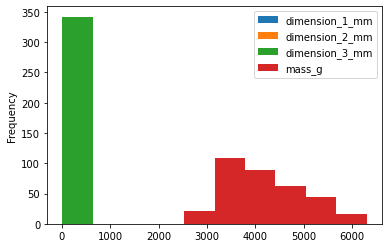

In [525]:
# Histogramme des valeurs quantitatives 
df.plot.hist()

# Bivariate analysis

<AxesSubplot:>

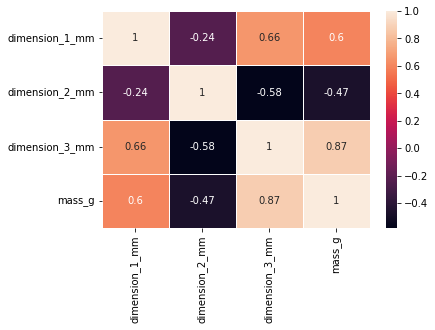

In [526]:
#Matrice de corrélation entre toutes les données numériques ave seaborn
sns.heatmap(df.corr(), annot=True, linewidths=0.5)

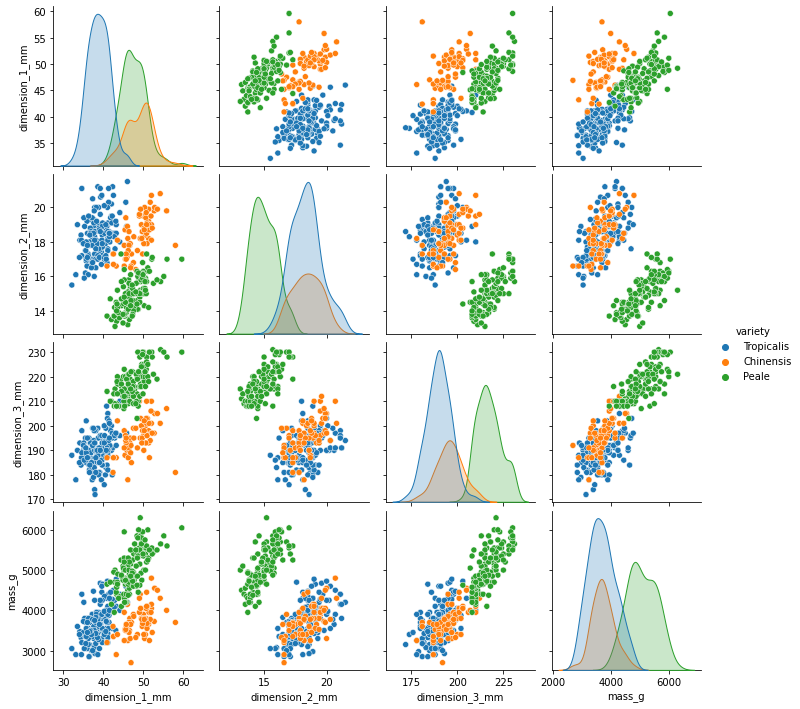

In [527]:
#Différents graphiques sur les 3 variétés possibles
sns.pairplot(data=df, hue='variety')

# Preprocessing des données

# Data Cleaning

In [528]:
#Suppression des lignes NaN
df = df.dropna()

In [529]:
#Vérification 
df.isna().sum()

variety           0
area              0
dimension_1_mm    0
dimension_2_mm    0
dimension_3_mm    0
mass_g            0
sex               0
dtype: int64

# Encodage

In [530]:
# Ajout du module scikit-learn
from sklearn.preprocessing import LabelEncoder

In [531]:
# Ajout des features X
X = df[['dimension_1_mm','dimension_2_mm', 'dimension_3_mm','mass_g']]

In [532]:
# Ajout des features Y
y = df['variety']

In [533]:
# Observation y avant encodage 
y

0      Tropicalis
1      Tropicalis
2      Tropicalis
4      Tropicalis
5      Tropicalis
          ...    
338         Peale
340         Peale
341         Peale
342         Peale
343         Peale
Name: variety, Length: 334, dtype: object

In [534]:
# Initialisation de l'encodeur
label_encod = LabelEncoder()

In [535]:
# Ajout de l'encodeur sur les données cibles
y = label_encod.fit_transform(y)

In [536]:
# Observation des données y encodés 
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Entrainer un modèle d'apprentissage supervisé

Ici nous devons prédire 3 types d'étiquettes (Tropicalis, Chinensis, Peale) sur un petit dataset, 
je vais donc choisir un modèle supérvisé de classification avec la méthode des KNeighbors Classifier 

# Train-Test-Split

Pour un apprentissage supervisé nous avons besoin de:

- un set d'entrainement 
- un set de test pour évaluer notre algo


In [537]:
# Chargement du module scikit-learn
from sklearn.model_selection import train_test_split

In [538]:
# Séparation du dataset en 2, avec 80% de train et 20% de test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [539]:
# Vérification du dataset
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 334
The length of the train dataset is   : 267
The length of the test dataset is    : 67


In [540]:
# Vérification de  X_train 
X_train

,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g
230,40.9,13.7,214.0,4650.0
84,37.3,17.8,191.0,3350.0
303,50.0,15.9,224.0,5350.0
22,35.9,19.2,189.0,3800.0
29,40.5,18.9,180.0,3950.0
...,...,...,...,...
194,50.9,19.1,196.0,3550.0
77,37.2,19.4,184.0,3900.0
112,39.7,17.7,193.0,3200.0
277,45.5,15.0,220.0,5000.0


In [541]:
# Vérification de  Y_train 
y_train

array([1, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0,
       0, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 2, 2, 1,
       0, 0, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1, 0, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 2, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 2, 2, 2, 0,
       2, 1, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2,
       2, 1, 1, 2, 1, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2,
       2, 1, 2])

# Construction du modèle

Construction du modèle de CLassification avec la méthode des KNeighbors

In [542]:
# Ajout du module de scikit-learn
from sklearn.neighbors import KNeighborsClassifier

In [543]:
# Choix du nombre de voisins proches avec k = 3
KNN_classifier = KNeighborsClassifier(n_neighbors=5)

In [544]:
# Entraînement du modèle 
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [545]:
# Prédiction
prediction = KNN_classifier.predict(X_test)

In [546]:
# Observation de la prediction
prediction

array([0, 1, 2, 0, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1,
       2])

In [547]:
# Observation de la réalité 
y_test

array([2, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 2, 1, 2, 1, 2, 2, 0, 2, 1, 2, 2,
       1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 2, 2, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 1,
       2])

# Matrice de confusion

Evualtion du modèle avec la matrice de confusion sur 3 étiquettes 

In [548]:
# Ajout du module scikit-learn
from sklearn.metrics import confusion_matrix, accuracy_score

In [549]:
# Calcule de la précision 
accuracy = accuracy_score(y_test, prediction)*100

In [550]:
# Observation de la performance global
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 80.6 %.


In [551]:
# Création de la matrice
confusion_matrix(y_test, prediction)

array([[ 8,  0,  5],
       [ 1, 22,  0],
       [ 2,  5, 24]], dtype=int64)

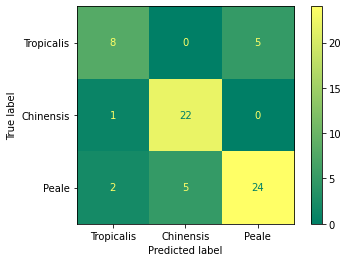

In [552]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(KNN_classifier, X_test, y_test,
                                 display_labels=['Tropicalis', 'Chinensis', 'Peale'],
                                 cmap=plt.cm.summer,
                                 normalize=None)

Ici on observe une précison moyenne de 80% et surtout une mauvaise prédiction du label "Tropicalis"

# Utilisation de la Cross Validation

Je vais utiliser la cross validation afin d'avoir un meilleur résultat

In [553]:
from sklearn.model_selection import train_test_split
from sklearn import datasets


In [554]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
scores


array([0.76119403, 0.79104478, 0.80597015, 0.80597015, 0.89393939])

In [555]:
print("%0.2f de précision avec une déviation de %0.2f" % (scores.mean(), scores.std()))

0.81 de précision avec une déviation de 0.04


In [556]:
print(scores.mean())

0.8116236996834012


# Choix du meilleur de nombre de K à utiliser 

In [557]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [558]:
# on choisit entre 1 et 31
k_range = range(1, 31)

In [559]:
k_scores = []

In [560]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    

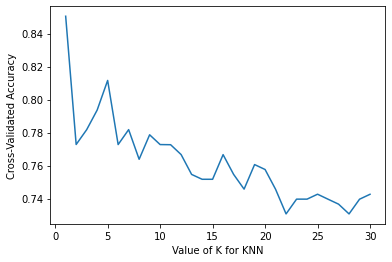

In [561]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

on observe que le meilleur paramètre est 5 voisins 

# Pipeline et Grid Search

Grid Search va me permettre de connaître les paramètres les plus adpatés avec le modèle KNN
Le standard scaler va permettre de recalibrer les données

In [562]:
# Ajout du module GridSearchCV et Pipeline de scikitlearn
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [563]:
#Création de la pipeline avec le KNN et un standardscaler 
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [584]:
param_grid = [{
    'kneighborsclassifier__n_neighbors': [5],
    'kneighborsclassifier__p': [1, 2],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}]

In [585]:
gs = GridSearchCV(pipeline, param_grid = param_grid,
                  scoring='accuracy',
                  refit=True,
                  cv=10,
                  verbose=1,
                  n_jobs=2)

In [586]:
gs.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 150 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 160 out of 160 | elapsed:    0.3s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=2,
             param_grid=[{'kneighborsclassifier__algorithm': ['auto',
                                                              'ball_tree',
                                                              'kd_tree',
                                                              'brute'],
                          'kneighborsclassifier__n_neighbors': [5],
                          'kneighborsclassifier__p': [1, 2],
                          'kneighborsclassifier__weights': ['uniform',
                                                            'distance']}],
             scoring='accuracy', verbose=1)

In [587]:
print('Best Score: %.3f' % gs.best_score_, '\nBest Parameters: ', gs.best_params_)

Best Score: 0.985 
Best Parameters:  {'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}


In [588]:
print('Score: %.3f' % gs.score(X_test, y_test))

Score: 0.985


# Choix de la métrique d'erreur 

In [592]:
from sklearn.metrics import classification_report

In [591]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.14      0.08      0.10        13
           1       0.33      0.30      0.32        23
           2       0.49      0.61      0.54        31

    accuracy                           0.40        67
   macro avg       0.32      0.33      0.32        67
weighted avg       0.37      0.40      0.38        67



Ici on observe un bon F1-score sur les 3 features, ce qui nous permet de mesurer la précision et le rappel à la fois

# Conclusion


Pour ce projet j'ai réussi à réalisé les tâches demandés, j'ai réussis à obtenir un score moyen et à pouvoir l'amélioré sur la suite, j'ai réussi à trouver les paramètres adaptés. Avec plus de temps j'aurais pu le comparer avec d'autres modèles, j'ai essayé avec le Support Vecteur Classification qui me donnait de bon résultats cependant je n'ai pas eu le temsp de le mettre en place, j'ai eu des difficultés concernant la compréhension de la cross validation, je pense qu'il me faut plus de temps afin de bien pouvoir tout expliquer et tout finir. Sur la fin, je ne comprends pas pourquoi j'obtiens maitenant un F1 score de 0.40 environ alors que j'étais à 0.85. 